In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv(r'C:\Users\mi\MLcourse\mlcourse.ai\data\telecom_churn.csv')

In [24]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [25]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [26]:
df['Churn'] = df['Churn'].astype('int')

In [27]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [28]:
state = df.pop('State')

In [29]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [30]:
X.shape

(3333, 18)

In [31]:
y.shape

(3333,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.3, random_state=24)

In [34]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [42]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [36]:
tree = DecisionTreeClassifier(random_state=24)

"fit-predict"

In [37]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

**Cross-Validation**

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [39]:
from tqdm import tqdm_notebook

In [40]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

In [43]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []

max_depth_values = np.arange(2, 11)

# for each value of max depth
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state=24, max_depth=curr_max_depth)
    
    # perform cross-validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    curr_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, curr_ho_pred))

<ipython-input-43-5f4e5067e39e>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for curr_max_depth in tqdm_notebook(max_depth_values):


  0%|          | 0/9 [00:00<?, ?it/s]

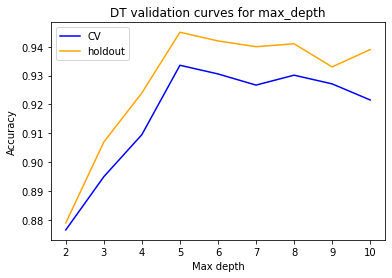

In [51]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.legend();
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [53]:
pred_holdout = tree.predict(X_holdout)

In [54]:
pred_holdout.shape

(1000,)

In [55]:
accuracy_score(y_holdout, pred_holdout)

0.939

In [56]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [57]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [58]:
params = {'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(2, 11)}

In [59]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

In [60]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [61]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=10, random_state=24),
             n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

In [62]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 5}

In [63]:
best_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=24)

**Cross-Validation assessment of model quality**

In [64]:
best_tree.best_score_

0.9357087059212763

**Holdout assessment**

In [65]:
pred_holdout_better = best_tree.predict(X_holdout)

In [66]:
accuracy_score(y_holdout, pred_holdout_better)

0.937

In [67]:
from sklearn.tree import export_graphviz

In [69]:
export_graphviz(decision_tree=best_tree.best_estimator_,
                out_file='tree.dot',
                filled=True,
                feature_names=df.drop('Churn', axis=1).columns)

In [71]:
tree = DecisionTreeClassifier(random_state=24, max_depth=3).fit(X_train, y_train)

In [72]:
export_graphviz(decision_tree=tree,
                out_file='tree_depth_3.dot',
                filled=True,
                feature_names=df.drop('Churn', axis=1).columns)